In [27]:
import pandas as pd
import matplotlib
import sklearn
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" #getting the dataset online
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] #giving the dataset columns
dataset = pd.read_csv(url, names=names)

In [19]:
array = dataset.values #making dataset a NumPy array
X = array[:,0:4] #data slicing - what will be tested
Y = array[:, 4] #data slicing - will be used for validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)
#0.20 is the 20% is for validating the test results

In [21]:
#testing various algorithms to see which one will predict future data best. The results of the each algorithm will be compared
#against the the 20% of the data that was not used for training (Y)
models = [] #blank list
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = [] #blank list
names = [] #blank list
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #compares accuracy of training results
    #against validation results
    results.append(cv_results) #collects the accuracy results in a list
    names.append(name) #lists the name of each algorithm
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #displays the mean and standard deviation of results

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.945513 (0.060355)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


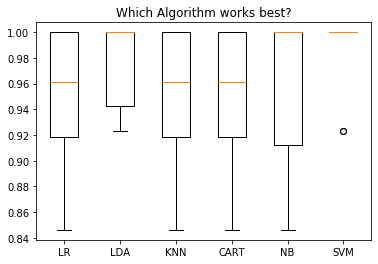

In [23]:
#visualising results in a boxplot
pyplot.boxplot(results, labels=names)
pyplot.title('Which Algorithm works best?')
pyplot.show()

In [28]:
#unlike in the example I am working from the algorithms that give the best results are LinearDiscriminantAnalysis, SVC and GaussianNB
#Create a model to predict future data
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

